<a href="https://colab.research.google.com/github/gkmurphy/PUS2024_GMurphy/blob/HW3/HW3_MultiVarLinReg_GwenMurphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read in the Data

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/SPPA704 - Urban Data Science/Homeworks/water_consumption.csv", index_col = 0)
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


In [2]:
# Ensure correct format types
# loc - label based indexing ; row : col

df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 21.0+ KB


# Descriptive Statistics

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0]

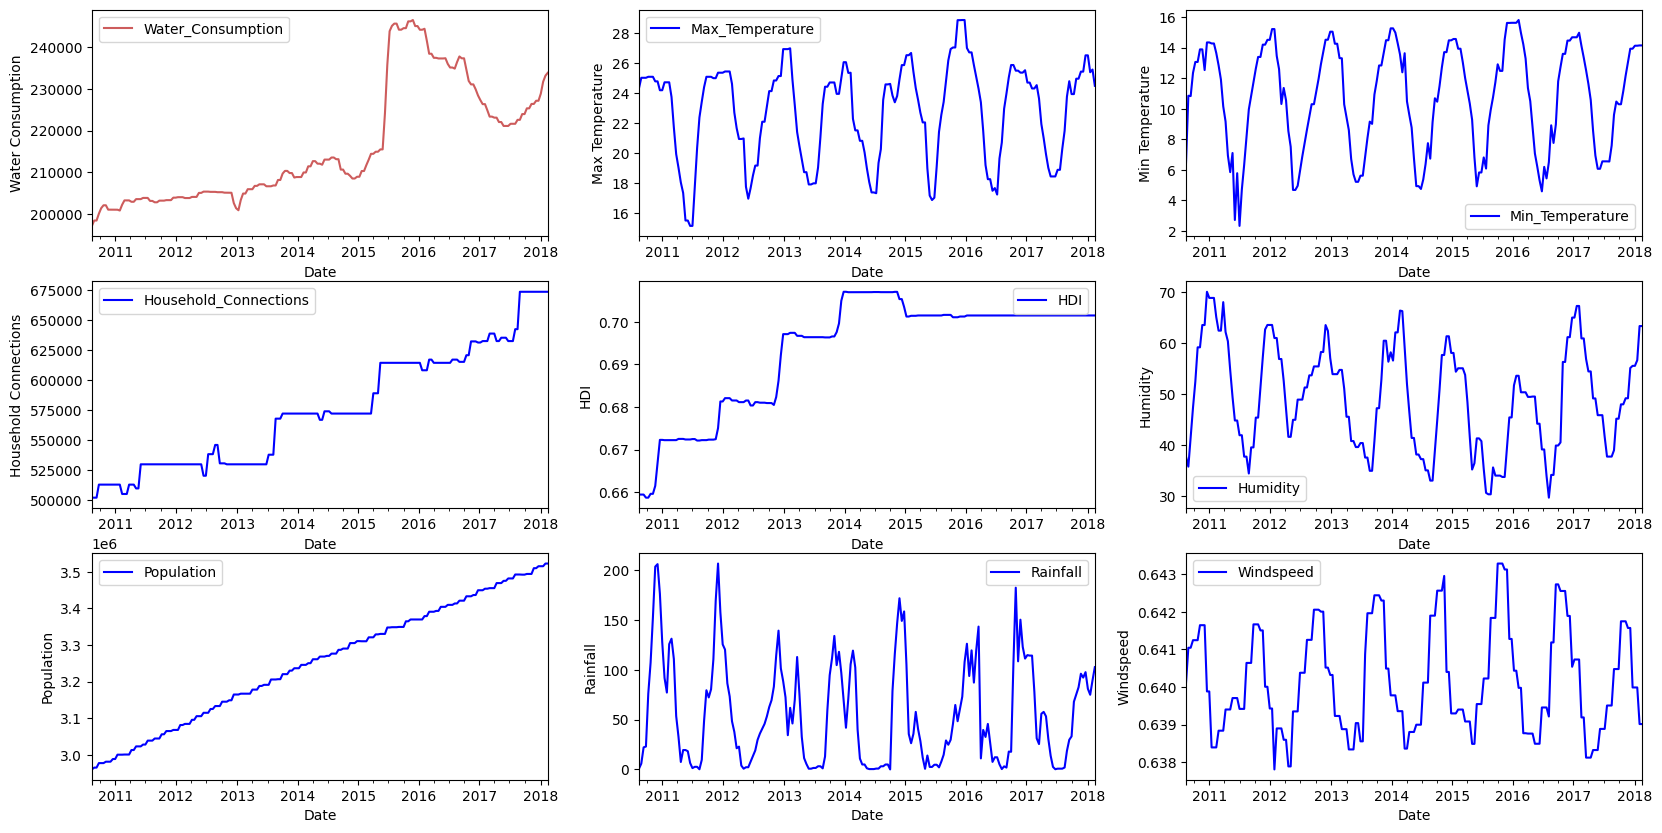

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10)) #size of plots

ax = plt.subplot(3,3,1) # rows, cols, and index for subplot placement
df.plot('Date', 'Water_Consumption', ax=ax, color = 'IndianRed') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Water Consumption')

ax = plt.subplot(3,3,2)
df.plot('Date', 'Max_Temperature', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Max Temperature')

ax = plt.subplot(3,3,3)
df.plot('Date', 'Min_Temperature', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Min Temperature')

ax = plt.subplot(3,3,4)
df.plot('Date', 'Household_Connections', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Household Connections')

ax = plt.subplot(3,3,5)
df.plot('Date', 'HDI', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('HDI')

ax = plt.subplot(3,3,6)
df.plot('Date', 'Humidity', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Humidity')

ax = plt.subplot(3,3,7)
df.plot('Date', 'Population', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Population')

ax = plt.subplot(3,3,8)
df.plot('Date', 'Rainfall', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Rainfall')

ax = plt.subplot(3,3,9)
df.plot('Date', 'Windspeed', ax=ax, color = 'Blue') #what cols to plot
plt.xlabel('Date')
plt.ylabel('Windspeed')

plt.tight_layout
plt.show()

## Caption 1: Water Variables Overtime
 Overview of all water consumption datapoints over the period of 2010 - 2018. There are some potential positive relationships between time and variables (e.g. population increases overtime), but many datapoints are variable overtime indicating a change in weather patters (rainfall, windspeed) that may or may not be correlated with other variables within certain time periods. We see a sharp spike in water consumption in 2015 that becomes variable after a steady linear increase in previous years.

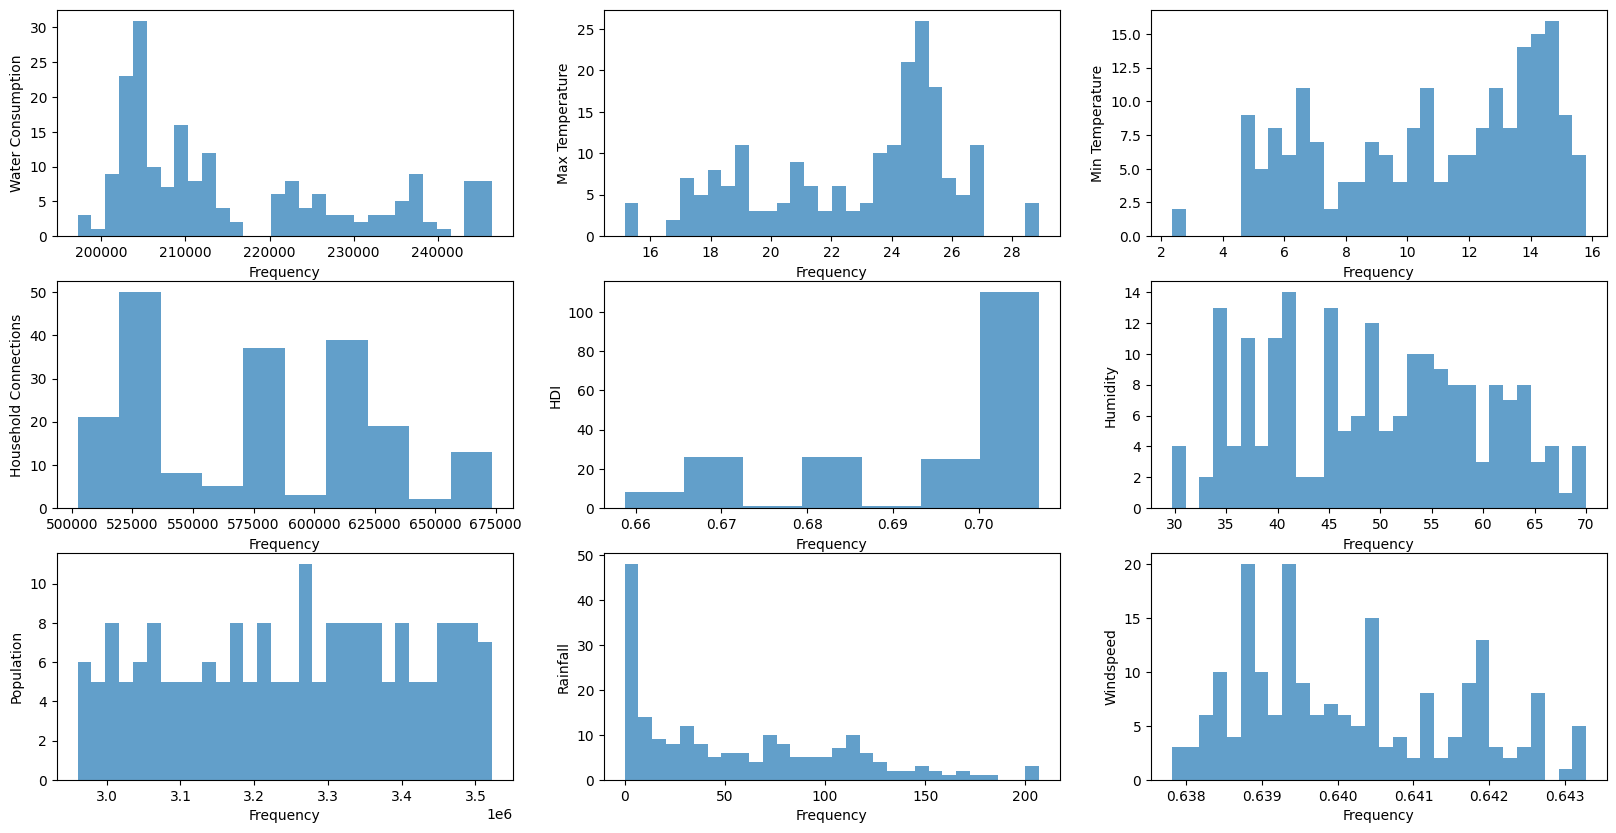

In [4]:
plt.figure(figsize = (20,10)) #size of plots

ax = plt.subplot(3,3,1) # rows, cols, and index for subplot placement
plt.hist(df['Water_Consumption'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Water Consumption')

ax = plt.subplot(3,3,2)
plt.hist(df['Max_Temperature'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Max Temperature')

ax = plt.subplot(3,3,3)
plt.hist(df['Min_Temperature'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Min Temperature')

ax = plt.subplot(3,3,4)
plt.hist(df['Household_Connections'], bins=10, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Household Connections')

ax = plt.subplot(3,3,5)
plt.hist(df['HDI'], bins=7, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('HDI')

ax = plt.subplot(3,3,6)
plt.hist(df['Humidity'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Humidity')

ax = plt.subplot(3,3,7)
plt.hist(df['Population'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Population')

ax = plt.subplot(3,3,8)
plt.hist(df['Rainfall'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Rainfall')

ax = plt.subplot(3,3,9)
plt.hist(df['Windspeed'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Windspeed')

plt.tight_layout
plt.show()

## Caption 2: Water Variable Histograms
 Overview of distribution of data for all variables in the water consumption dataset with 20 bins per histrogram with the exception of Household connections (10) and HDI (7) which have a tighter spread of data that cannot be seen well with higher bins. None appear to be bell-shaped although some have highly variable (humidity, windspeed) left skew (rainfall), or multipeak (temperature, consumption) distributions.

# Exploratory Data Analysis

In [5]:
#Correlation Matrix
df.iloc[:,1:].corr()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


## Caption 3: Correlation Matrix
The maximum result we can get with unvariate linear regression based on the correlation matrix above and the model's R^2 is between household connections and population which has the highest correlation coefficient at .961420. The next is likely between min and max temperature with a correlation coefficient of .894710.

If we're looking specifically at correlations to water consumption, it would likely be household connections (.811606).

#Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

y = df['Water_Consumption']
x = df[['Household_Connections']] #must be 2d for fit

model_univariate = LinearRegression().fit(x,y)
prediction = model_univariate.predict(x)

print("Coefficient:" , model_univariate.coef_[0])
print("Intercept: ", model_univariate.intercept_)

Coefficient: 0.2355345525992826
Intercept:  80543.246953786


Text(0, 0.5, 'Water Consumption')

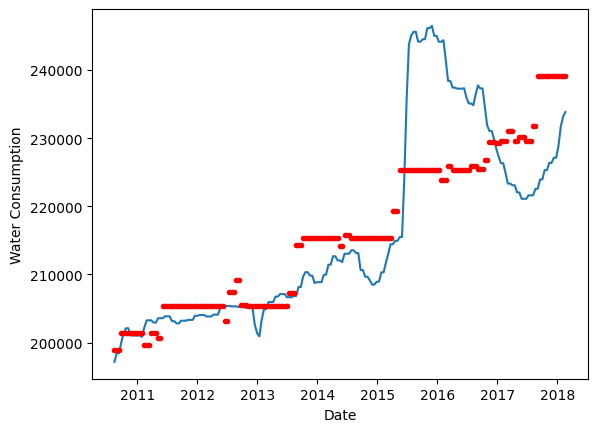

In [7]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], prediction, 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


## Caption 3: Univariate Regression
This linear regression model is not capturing the complexity or the underlying relationship well because the water consumption data is not linear and cannot easily be fit with this method. We must consider polynomial or multivariate.

In [8]:
import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        14:56:07   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

## Caption 4: OLS Regression
The R^2 is 0.731, which means that ~73% of the variability in the water consumption data is explained by this model. This is an OK fit. The P>|t| value for household connections is 0.026 which is significant with a sig value of 0.05 meaning this is a statistically significant predictor of water consumption data. HDI, humidity, population, and max/min temperature also have statistically sig values.

### Standardization via Scaling Before Regression
NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the shape of the distribution, it just translates it and shrinks it

In [9]:
from sklearn.preprocessing import StandardScaler

#make a list of numerical cols (they are float64 from above)
numerical_features = df.select_dtypes(include=['float64']).columns.tolist()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

scaled_features = scaler.transform(df[numerical_features])

#make a copy with scaled features
df_copy = df.copy()
df_copy[numerical_features] = scaled_features
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

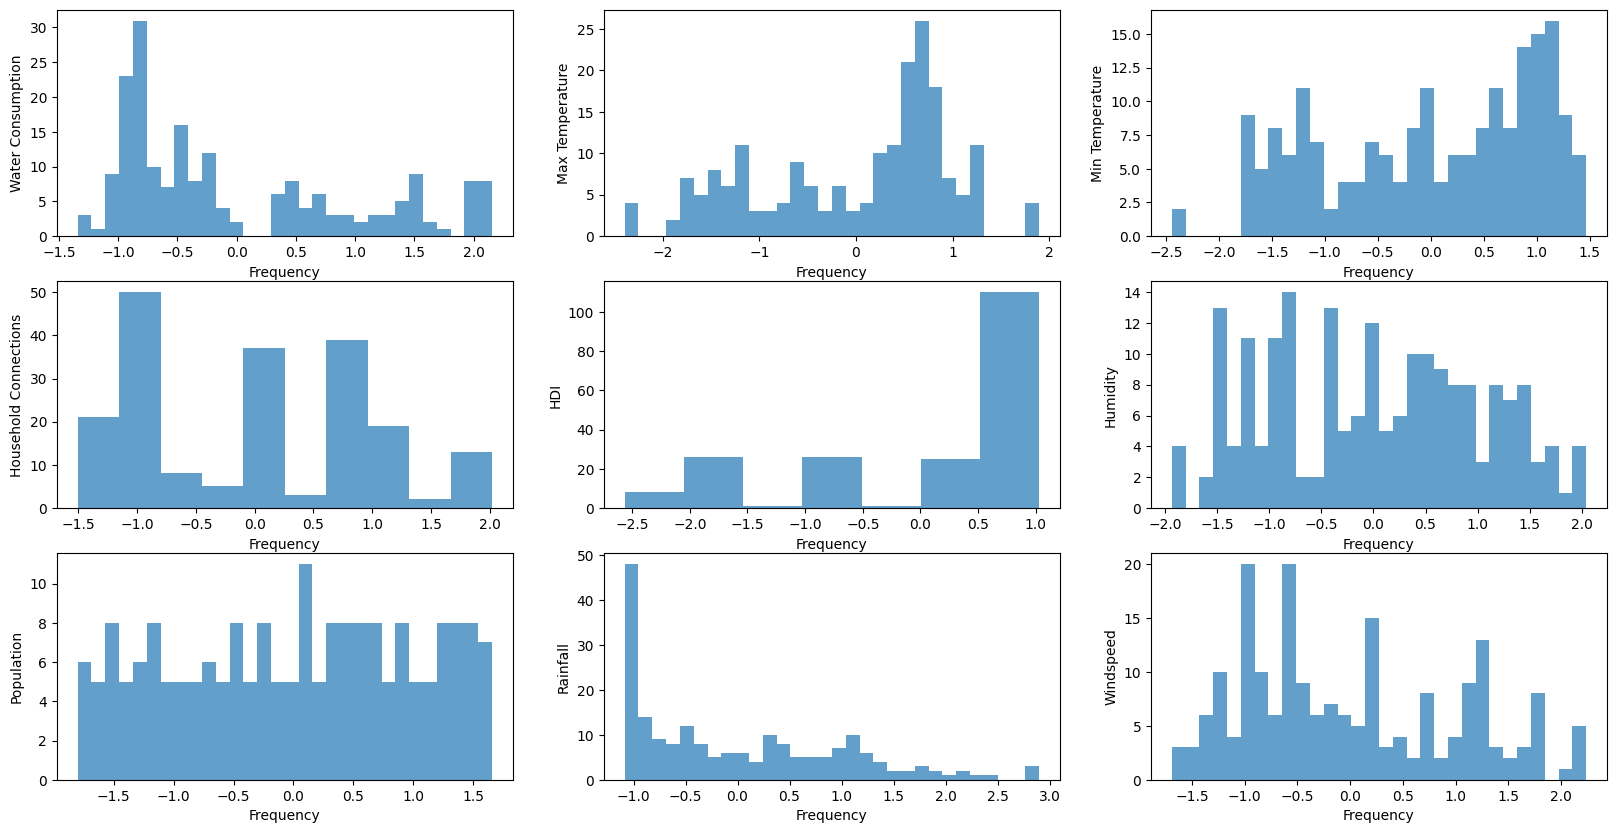

In [10]:
plt.figure(figsize = (20,10)) #size of plots

ax = plt.subplot(3,3,1) # rows, cols, and index for subplot placement
plt.hist(df_copy['Water_Consumption'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Water Consumption')

ax = plt.subplot(3,3,2)
plt.hist(df_copy['Max_Temperature'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Max Temperature')

ax = plt.subplot(3,3,3)
plt.hist(df_copy['Min_Temperature'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Min Temperature')

ax = plt.subplot(3,3,4)
plt.hist(df_copy['Household_Connections'], bins=10, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Household Connections')

ax = plt.subplot(3,3,5)
plt.hist(df_copy['HDI'], bins=7, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('HDI')

ax = plt.subplot(3,3,6)
plt.hist(df_copy['Humidity'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Humidity')

ax = plt.subplot(3,3,7)
plt.hist(df_copy['Population'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Population')

ax = plt.subplot(3,3,8)
plt.hist(df_copy['Rainfall'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Rainfall')

ax = plt.subplot(3,3,9)
plt.hist(df_copy['Windspeed'], bins=30, alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Windspeed')

plt.tight_layout
plt.show()

## Caption 5: Scaled Water Variable Histograms
 Identical to above - only scale changed.

In [11]:
#All stats within new, smaller scale
df_copy.describe()


,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,-5.770905e-16,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,-1.342012e+00,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,-8.495739e-01,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,-4.095261e-01,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,7.268914e-01,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,2.155878e+00,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00


In [23]:
from sklearn.model_selection import train_test_split

vars = [feature for feature in numerical_features if feature != 'Water_Consumption']
print(vars)

X1 = df_copy[vars]

x_train, x_test, y_train, y_test = train_test_split(X1, y)


['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed']


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

model_multivarivate = LinearRegression()
model_multivarivate.fit(x_train, y_train)
y_pred = model_multivarivate.predict(x_test) #predicts based on indy

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:" , list(zip(vars, model_multivarivate.coef_)))
print("Intercept: ", model_multivarivate.intercept_)

Mean Squared Error: 62854827.47304576
R-squared: 0.6451464252075074
Coefficients: [('Max_Temperature', -3297.4496593048702), ('Min_Temperature', 6582.625006970224), ('HDI', -2934.686496760019), ('Household_Connections', 7629.54526767048), ('Humidity', -6717.128184960862), ('Population', 5351.6054987828775), ('Rainfall', 1178.1574908292873), ('Windspeed', 130.716982114016)]
Intercept:  216375.26826974


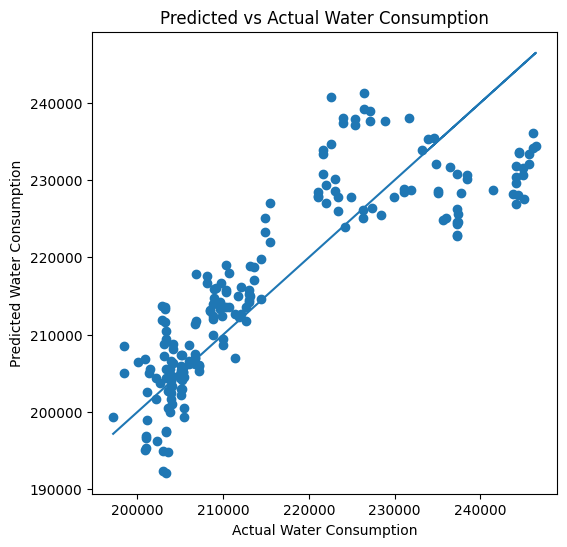

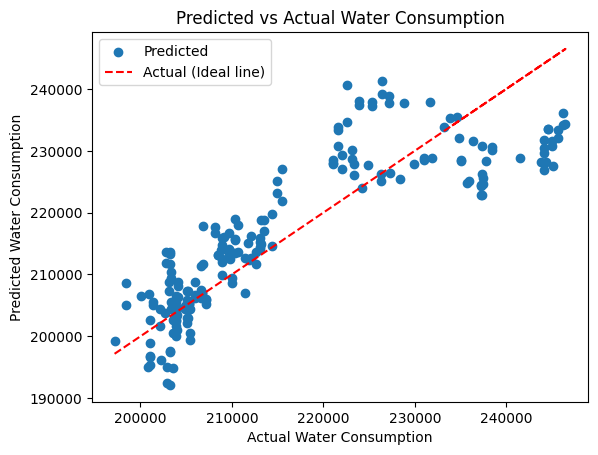

In [25]:
plt.figure(figsize=(6, 6))

# Plot predicted vs actual water consumption
plt.scatter(y, model_multivarivate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


#Asked Chat GBT how to label these differently to see the lines separately
plt.scatter(y, model_multivarivate.predict(X1), label='Predicted')
plt.plot(y, y, 'r--', label='Actual (Ideal line)')
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.legend()
plt.show()

## Caption 6: Multivariate Predicted vs Actual based on model outcomes
The model is predicting the data moderately well with a R^2 of 0.645. There is more error in high water consumption suggesting that we are missing some information to explain the variance. However, it would be difficult to fit a line to this spread indicating there is more than one variable influecing water consumption.

Text(0, 0.5, 'Water Consumption')

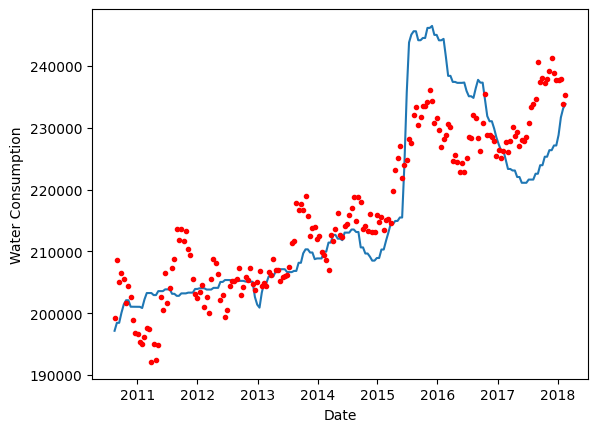

In [27]:

plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivarivate.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

## Caption 7: Predicted vs actual data
Similar to above, this plot displays the predicted water consumption over time, showing that the predicted points align more closely with actual values compared to the univariate model. This supports the above conclusion that the muultivariate model captures the relationship/variance in the data better.

# Simplify The Model
Only use the columns that have a correlation higher than 0.5 r > 0.5 with Water_consumption - should be 'HDI', 'Household_Connections', and 'Population' from below.

In [28]:

df_copy.iloc[:,1:].corr() > 0.5

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,True,True,False,False,False,False,False,True,False
Min_Temperature,True,True,False,False,False,True,False,True,False
HDI,False,False,True,True,True,False,True,False,False
Household_Connections,False,False,True,True,True,False,True,False,False
Water_Consumption,False,False,True,True,True,False,True,False,False
Humidity,False,True,False,False,False,True,False,True,False
Population,False,False,True,True,True,False,True,False,False
Rainfall,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,True


In [30]:
#Asked chatgbt how to programatically take the above
# Get the correlation matrix for numerical features
correlation_matrix = df_copy[numerical_features].corr()

# Filter variables that have a correlation > 0.5 with 'Water_Consumption'
vars2 = correlation_matrix['Water_Consumption'][correlation_matrix['Water_Consumption'] > 0.5].index.tolist()

# Exclude 'Water_Consumption' itself from vars2
vars2.remove('Water_Consumption')

# Display the resulting variables
print(vars2)



['HDI', 'Household_Connections', 'Population']


In [31]:
X2 = df_copy[vars2] #select indepedent variables

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2)

In [32]:
model_sig = LinearRegression().fit(x_train2, y_train2)
y_pred2 = model_sig.predict(x_test2) #predicts based on indy

mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print("Coefficients:" , list(zip(vars2, model_sig.coef_)))
print("Intercept: ", model_sig.intercept_)

Coefficients: [('HDI', -70.76793672724163), ('Household_Connections', 10028.062413113377), ('Population', 1562.863148029428)]
Intercept:  216178.7416980802


Text(0, 0.5, 'Water Consumption')

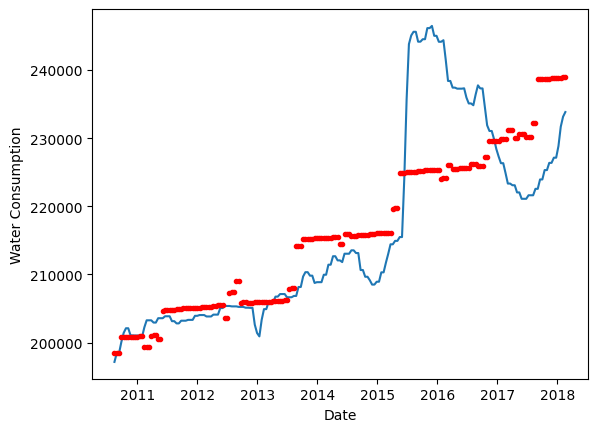

In [33]:

plt.plot(df['Date'], y)
plt.plot(df['Date'], model_sig.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

## Caption 8: Restricted sig > 0.05 model
Similar to the earlier comparison of the univariate model to water consumption overtime, we are seeing jumps in the data showing a sharp increase in water consumption from year to year; however year alone does not explain the large increase in 2016 as the trend in the increase has changed in the actual data compared to the prediction based on date.



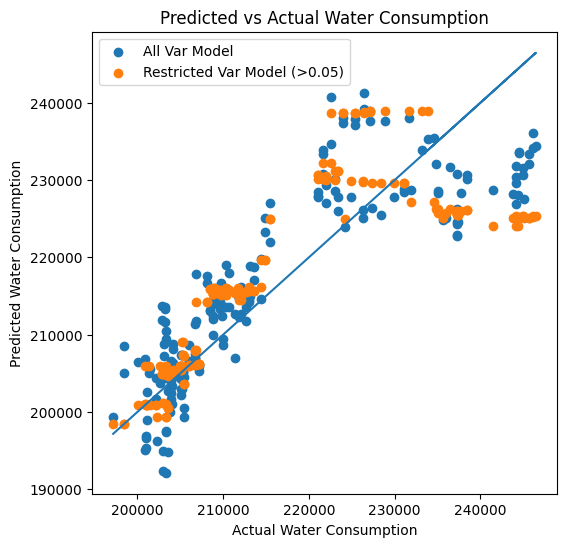

In [37]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivarivate.predict(X1), label='All Var Model')
plt.scatter(y, model_sig.predict(X2), label='Restricted Var Model (>0.05)')
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)

plt.legend()
plt.show()


## Caption 9: Restricted sig > 0.05 model
Both models have scatter from the center line (perfect match with actual), but the all variable model appears to be tigher overall without the clustering seen in the model restricted to variables with high significance. The clustering might mean it's overfitting to a detail in the data other than water consumption. This is especially notable in the higher value range as both models perform reasonably well in the lower water consumption range (< 2200000).

In [22]:
#This is from stats model - you need to calculculate the log likeliehood and put it in scipy.
#This is for the next hw
#model_sig.compare_lr_test(model_multivarivate)